# Importing Dataset

In [1]:
import pandas as pd

data = pd.read_csv('breast-cancer-wisconsin.data',names = [
    'Sample code number',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class'
])




data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
data.dtypes


Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

# Preprocessing

In [3]:
def is_non_numrix(x):
    return not x.isnumeric()

In [4]:
mask = data['Bare Nuclei'].apply(is_non_numrix)

data_non_numeric = data[mask]

data_non_numeric.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2


In [5]:
data_numeric = data[~mask]

In [6]:
print(len(data))
print(len(data_numeric))

699
683


In [7]:
data_numeric.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [8]:
data_numeric['Bare Nuclei'] = data_numeric['Bare Nuclei'].astype('int64')

C:\Users\compunil\AppData\Local\Temp\ipykernel_4580\1266938030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['Bare Nuclei'] = data_numeric['Bare Nuclei'].astype('int64')


In [9]:
data_numeric.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [10]:
data_input = data_numeric.drop(columns = ['Sample code number','Class'])
data_output = data_numeric['Class']

In [11]:
data_input.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [12]:
data_output.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [13]:
data_output = data_output.replace({2:0,4:1})

In [14]:
data_output.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Spliting data

In [15]:
from sklearn.model_selection import train_test_split
x,x_test, y,  y_test = train_test_split(data_input, data_output, test_size=1/3, random_state=2)

x_train,x_val, y_train,  y_val = train_test_split(x, y, test_size=1/3, random_state=2)



# Comparison between algorithms

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,fbeta_score




models = {
    "LR": LogisticRegression(),
    "RF": RandomForestClassifier(n_estimators=100,max_depth=7),
    "DT": DecisionTreeClassifier(),
    "GradientBoosting"  :  GradientBoostingClassifier(n_estimators=100,max_depth=7),
    #"XGB": XGBClassifier(n_estimators=100),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC()
}



for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')    


Training Model LR 
-----------------------------------------------
Training Accuracy: 0.9900990099009901
Testing Accuracy: 0.9429824561403509
Testing Confusion Matrix: 
[[130   9]
 [  4  85]]
Testing Recall: 0.9550561797752809
Testing Precesion: 0.9042553191489362
Testing F-1: 0.9289617486338798
Testing F-Beta: 0.9139784946236558
Training Model RF 
-----------------------------------------------
Training Accuracy: 1.0
Testing Accuracy: 0.9605263157894737
Testing Confusion Matrix: 
[[130   9]
 [  0  89]]
Testing Recall: 1.0
Testing Precesion: 0.9081632653061225
Testing F-1: 0.9518716577540107
Testing F-Beta: 0.9251559251559252
Training Model DT 
-----------------------------------------------
Training Accuracy: 1.0
Testing Accuracy: 0.9254385964912281
Testing Confusion Matrix: 
[[126  13]
 [  4  85]]
Testing Recall: 0.9550561797752809
Testing Precesion: 0.8673469387755102
Testing F-1: 0.9090909090909092
Testing F-Beta: 0.8835758835758836
Training Model GradientBoosting 
----------------

D:\desktop 2022\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\desktop 2022\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

# Training model by DT

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3,random_state = 2)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [18]:
y_pred_train =model.predict(x_train)
y_pred_val =model.predict(x_val)

In [19]:
from sklearn.metrics import  accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_val,y_pred_val))

0.9867986798679867
0.9671052631578947


# Choose Best Max_depth

In [20]:
max_depth_values = [1,2,3,4,5,6,7,8]
train_accuracy_values =[]
val_accuracy_values = []
for max_depth_val in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth_val,random_state = 2)
    model.fit(x_train, y_train)
    y_pred_train =model.predict(x_train)
    y_pred_val =model.predict(x_val)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_val=accuracy_score(y_val,y_pred_val)
    train_accuracy_values.append(acc_train)
    val_accuracy_values.append(acc_val)

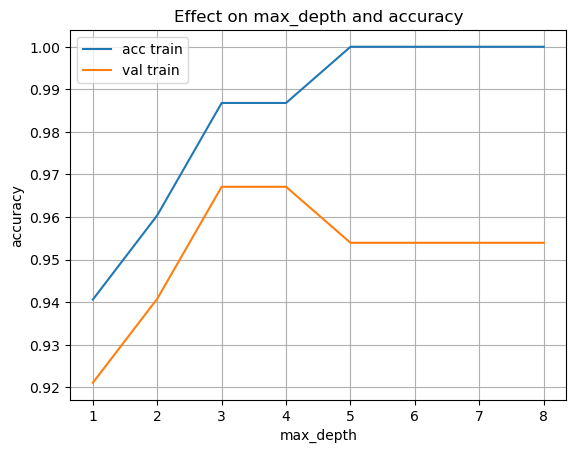

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.plot(max_depth_values,train_accuracy_values,label = 'acc train')
plt.plot(max_depth_values,val_accuracy_values,label = 'val train')
plt.legend()
plt.grid(axis='both')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect on max_depth and accuracy')
plt.show()



In [22]:
final_model = DecisionTreeClassifier(max_depth=3,random_state = 0)
final_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [23]:
y_pred_test = final_model.predict(x_test)
print(accuracy_score(y_test,y_pred_test))


0.9473684210526315


# Save model

In [24]:
import pickle

with open('saved-model.pickle','wb') as f:
    pickle.dump(final_model,f)
    

#  Visualizing Tree

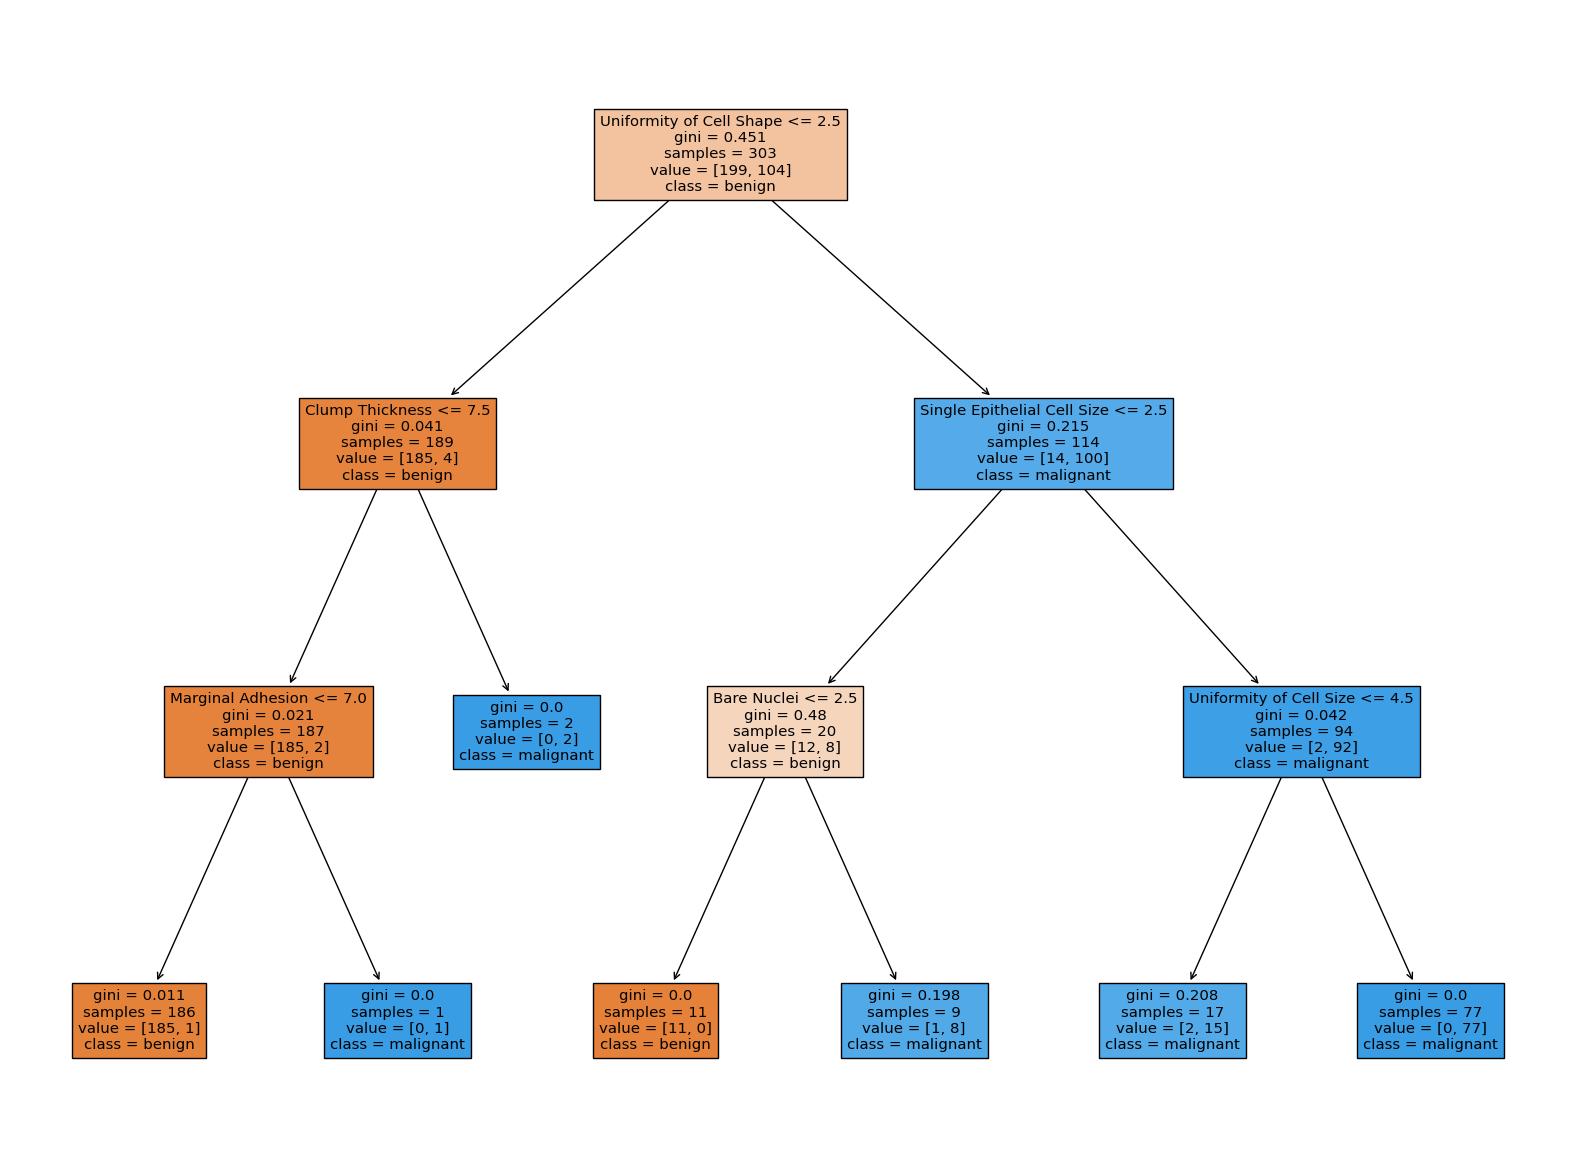

In [25]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(final_model,
        feature_names=[
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses'
    ],
    class_names =['benign','malignant'],
    filled=True
)
plt.show()

# feature_importances

In [26]:
final_model.feature_importances_

array([0.02995471, 0.00298105, 0.80592766, 0.01521893, 0.08542603,
       0.06049163, 0.        , 0.        , 0.        ])

<module 'matplotlib.pyplot' from 'D:\\desktop 2022\\New folder\\lib\\site-packages\\matplotlib\\pyplot.py'>

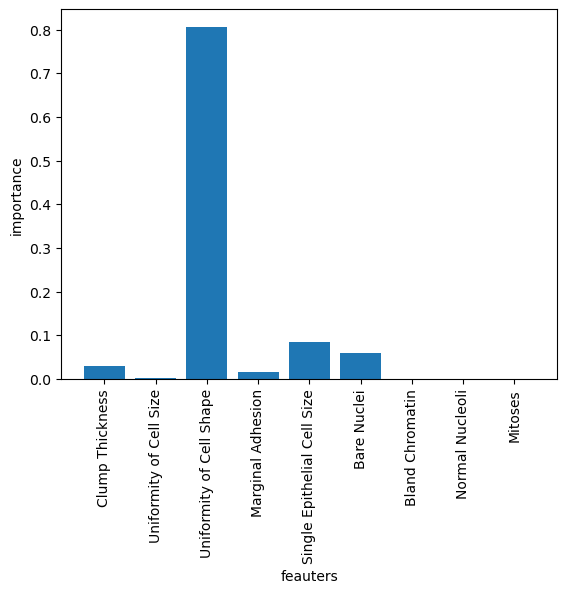

In [27]:
feature_names=[
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses'
    ]
plt.bar(feature_names,final_model.feature_importances_)
plt.xlabel('feauters')
plt.xticks(rotation=90)
plt.ylabel('importance')

plt

# Model evaluation

In [65]:
from sklearn.metrics import confusion_matrix

# predict on test data
y_pred_test = final_model.predict(x_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# print confusion matrix
print('Confusion Matrix:\n', cm)


Confusion Matrix:
 [[127  12]
 [  0  89]]


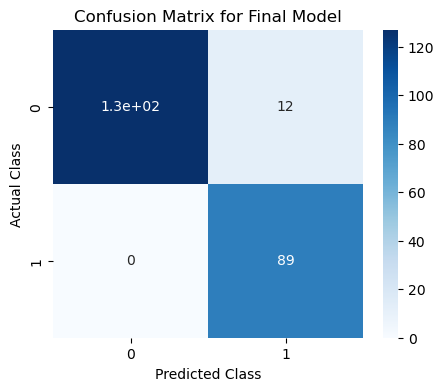

In [66]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Final Model')
plt.show()


In [67]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test)

accuracy = accuracy_score(y_test, y_pred_test)
precision = cm[1,1]/(cm[0,1]+cm[1,1])
recall = cm[1,1]/(cm[1,0]+cm[1,1])
f1_score = 2*precision*recall/(precision+recall)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Classification Report:\n', report)


Accuracy: 0.9473684210526315
Precision: 0.8811881188118812
Recall: 1.0
F1 Score: 0.9368421052631579
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       139
           1       0.88      1.00      0.94        89

    accuracy                           0.95       228
   macro avg       0.94      0.96      0.95       228
weighted avg       0.95      0.95      0.95       228

